# CVD Risk Score Regression Analysis

This notebook demonstrates how to predict the continuous CVD risk score from the dataset using various machine learning regression models, including deep learning. The workflow includes data loading, preprocessing, feature selection, model training, evaluation, and visualization.

---

## 1. Import Required Libraries
Import libraries for data manipulation, visualization, and regression modeling.

In [47]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

## 2. Load and Explore the Dataset
Load the CVD dataset, display its shape, columns, and basic statistics. Visualize the distribution of the risk score.

Dataset shape: (1529, 22)


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88



Columns: ['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level', 'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score']

Basic statistics:


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
count,1529,1451.000000,1448.000000,1462.000000,1465.000000,1462.000000,1529,1456.000000,1449.000000,1462.000000,...,1529,1529,1529,1455.000000,1450.000000,1458.000000,1447.000000,1529,1460.000000,1459.000000
unique,2,NaN,NaN,NaN,NaN,NaN,1254,NaN,NaN,NaN,...,3,2,3,NaN,NaN,NaN,NaN,4,NaN,NaN
top,F,NaN,NaN,NaN,NaN,NaN,127/84,NaN,NaN,NaN,...,High,N,HIGH,NaN,NaN,NaN,NaN,Hypertension Stage 2,NaN,NaN
freq,773,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,521,780,728,NaN,NaN,NaN,NaN,632,NaN,NaN
mean,NaN,47.025500,85.917427,1.754111,28.465997,91.773214,NaN,198.539148,56.197378,117.485636,...,NaN,NaN,NaN,175.390600,0.525727,125.627572,82.917761,NaN,111.550685,16.960925
std,NaN,12.421063,21.012580,0.113090,7.038685,12.823573,NaN,57.794099,16.066754,30.289174,...,NaN,NaN,NaN,11.251527,0.081213,22.112099,14.731277,NaN,58.866220,2.436192
min,NaN,25.000000,50.100000,1.502000,15.000000,70.000000,NaN,100.000000,30.000000,70.000000,...,NaN,NaN,NaN,150.000000,0.360000,90.000000,60.000000,NaN,-18.000000,10.530000
25%,NaN,37.000000,67.050000,1.660000,22.629000,80.500000,NaN,150.000000,42.000000,92.000000,...,NaN,NaN,NaN,166.000000,0.460000,107.000000,71.000000,NaN,61.000000,15.205000
50%,NaN,46.000000,86.614500,1.755000,28.159000,91.600000,NaN,197.000000,56.000000,115.000000,...,NaN,NaN,NaN,175.694000,0.522000,125.000000,82.000000,NaN,109.000000,16.880000
75%,NaN,55.000000,105.000000,1.845500,34.000000,102.269000,NaN,249.000000,70.000000,138.000000,...,NaN,NaN,NaN,184.208500,0.583750,141.000000,93.000000,NaN,159.000000,18.630000


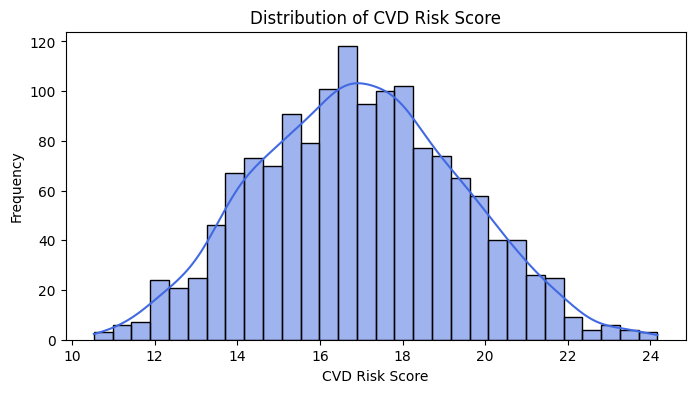

In [48]:
# Load the CVD dataset
csv_path = 'CVD_Dataset.csv'
df = pd.read_csv(csv_path)
print(f"Dataset shape: {df.shape}")
display(df.head())
print("\nColumns:", df.columns.tolist())
print("\nBasic statistics:")
display(df.describe(include='all'))

# Visualize the distribution of the risk score
plt.figure(figsize=(8, 4))
sns.histplot(df['CVD Risk Score'], kde=True, bins=30, color='royalblue')
plt.title('Distribution of CVD Risk Score')
plt.xlabel('CVD Risk Score')
plt.ylabel('Frequency')
plt.show()

## 3. Preprocess Data for Regression
Handle missing values, encode categorical variables, and ensure the risk score is a continuous variable suitable for regression.

In [49]:
# Preprocess Data for Regression
# Drop rows with missing target (CVD Risk Score)
df = df.dropna(subset=['CVD Risk Score'])

# Separate features and target
y = df['CVD Risk Score']
X = df.drop(['CVD Risk Score', 'CVD Risk Level'], axis=1, errors='ignore')

# Identify categorical columns
df_obj = X.select_dtypes(include=['object'])
categorical_cols = df_obj.columns.tolist()

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_num = X.drop(columns=categorical_cols)
X_num_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=X_num.columns)

# Encode categoricals
if categorical_cols:
    X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)
    X_processed = pd.concat([X_num_imputed, X_cat], axis=1)
else:
    X_processed = X_num_imputed.copy()

print(f"Processed features shape: {X_processed.shape}")
print(f"Target variable type: {y.dtype}")

Processed features shape: (1524, 1222)
Target variable type: float64


## 4. Feature Selection
Select relevant features for predicting the risk score using correlation analysis and feature importance.

Top 15 features by absolute correlation with CVD Risk Score:


Diabetes Status_Y                               0.452276
Blood Pressure Category_Normal                  0.254172
Blood Pressure Category_Hypertension Stage 2    0.209559
Blood Pressure (mmHg)_175/98                    0.082062
Blood Pressure (mmHg)_149/61                    0.077524
Blood Pressure (mmHg)_97/75                     0.076993
Blood Pressure (mmHg)_150/80                    0.074406
Blood Pressure (mmHg)_172/63                    0.070663
Blood Pressure (mmHg)_145/93                    0.070427
Blood Pressure (mmHg)_107/61                    0.069156
Blood Pressure (mmHg)_177/76                    0.068717
Blood Pressure (mmHg)_158/74                    0.068202
Blood Pressure (mmHg)_102/62                    0.067257
Blood Pressure (mmHg)_156/68                    0.067039
Blood Pressure (mmHg)_164/101                   0.067029
dtype: float64

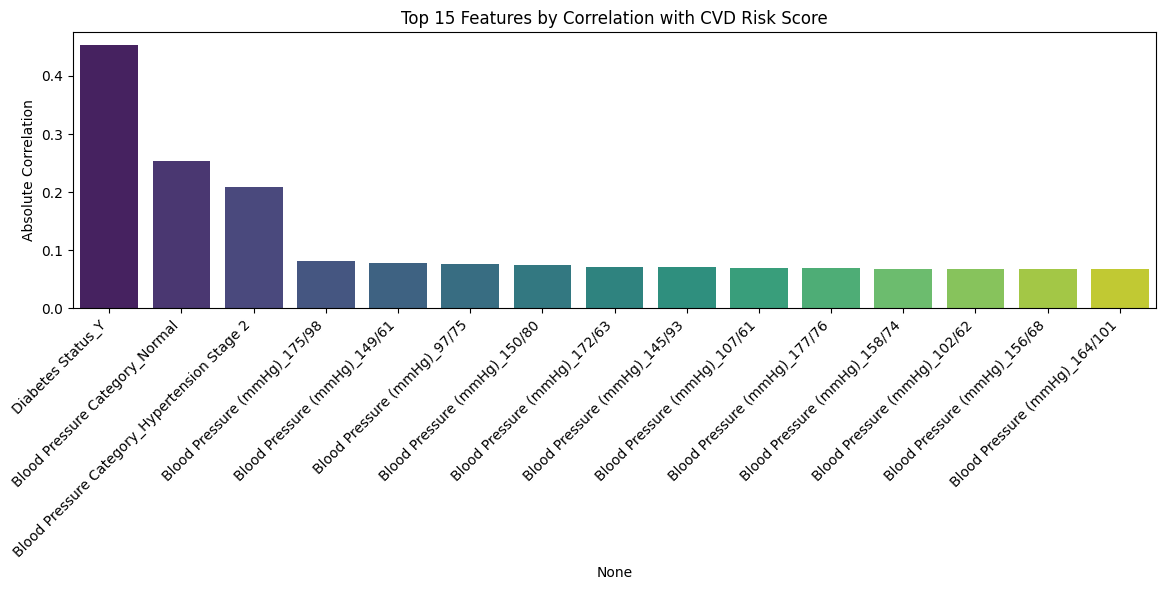


Original features: 1222
Enhanced features (with interactions): 1267
Enhanced features after imputation: 1267
X_enhanced_aligned shape: (1459, 1267), y shape: (1459,)
Final selected features: 50

Top 10 selected features by F-regression score:


,feature,score
47,Diabetes Status_Y,374.674848
1,Diabetes Status_Y Blood Pressure Category_Hype...,216.498429
49,Blood Pressure Category_Normal,100.628140
48,Blood Pressure Category_Hypertension Stage 2,66.923301
38,Blood Pressure (mmHg)_175/98,9.878092
9,Blood Pressure Category_Hypertension Stage 2 B...,9.878092
24,Blood Pressure (mmHg)_149/61,8.809551
3,Diabetes Status_Y Blood Pressure (mmHg)_149/61,8.809551
10,Blood Pressure Category_Hypertension Stage 2 B...,8.809551
45,Blood Pressure (mmHg)_97/75,8.688537


In [50]:
# Enhanced Feature Selection and Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

# Original correlation analysis
corr = X_processed.corrwith(y).abs().sort_values(ascending=False)
print("Top 15 features by absolute correlation with CVD Risk Score:")
display(corr.head(15))

# Visualize top correlated features
plt.figure(figsize=(12, 6))
sns.barplot(x=corr.head(15).index, y=corr.head(15).values, palette='viridis')
plt.title('Top 15 Features by Correlation with CVD Risk Score')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature Engineering: Create interaction features for top correlated features
top_features = corr.head(10).index.tolist()
X_top = X_processed[top_features]

# Handle missing values in X_top before polynomial transformation
from sklearn.impute import SimpleImputer
imputer_top = SimpleImputer(strategy='most_frequent')  # Use most_frequent for categorical features
X_top_imputed = pd.DataFrame(imputer_top.fit_transform(X_top), columns=top_features, index=X_top.index)

# Add polynomial features (degree 2) for top features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_top_imputed)
poly_feature_names = poly.get_feature_names_out(top_features)

# Combine original features with polynomial features
X_enhanced = pd.concat([
    X_processed,
    pd.DataFrame(X_poly[:, len(top_features):], columns=poly_feature_names[len(top_features):], index=X_processed.index)
], axis=1)

print(f"\nOriginal features: {X_processed.shape[1]}")
print(f"Enhanced features (with interactions): {X_enhanced.shape[1]}")

# Handle missing values in X_enhanced before feature selection
# Separate numeric and categorical columns
numeric_cols = X_enhanced.select_dtypes(include=[np.number]).columns
categorical_cols = X_enhanced.select_dtypes(include=['object', 'bool']).columns

# Impute numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
X_enhanced_numeric = pd.DataFrame(
    numeric_imputer.fit_transform(X_enhanced[numeric_cols]), 
    columns=numeric_cols, 
    index=X_enhanced.index
)

# Impute categorical columns with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_enhanced_categorical = pd.DataFrame(
    categorical_imputer.fit_transform(X_enhanced[categorical_cols]), 
    columns=categorical_cols, 
    index=X_enhanced.index
)

# Combine imputed features
X_enhanced_clean = pd.concat([X_enhanced_numeric, X_enhanced_categorical], axis=1)

print(f"Enhanced features after imputation: {X_enhanced_clean.shape[1]}")

# Align X_enhanced_clean with y by using the same indices
X_enhanced_aligned = X_enhanced_clean.loc[y.index]
print(f"X_enhanced_aligned shape: {X_enhanced_aligned.shape}, y shape: {y.shape}")

# Use SelectKBest to select most relevant features
selector = SelectKBest(score_func=f_regression, k=min(50, X_enhanced_aligned.shape[1]))
X_selected_best = selector.fit_transform(X_enhanced_aligned, y)
selected_feature_names = X_enhanced_aligned.columns[selector.get_support()].tolist()

# Create final feature set
X_selected = pd.DataFrame(X_selected_best, columns=selected_feature_names, index=y.index)
print(f"Final selected features: {X_selected.shape[1]}")

# Show feature selection results
feature_scores = pd.DataFrame({
    'feature': selected_feature_names,
    'score': selector.scores_[selector.get_support()]
}).sort_values('score', ascending=False)

print("\nTop 10 selected features by F-regression score:")
display(feature_scores.head(10))

## 5. Train/Test Split
Split the dataset into training and testing sets for regression.

In [51]:
# Train/Test Split
# Align indices to avoid length mismatch
X_selected = X_selected.loc[X_selected.index.intersection(y.index)].copy()
y_aligned = y.loc[X_selected.index].copy()
print(f'X_selected shape: {X_selected.shape}, y_aligned shape: {y_aligned.shape}')
X_selected = X_selected.reset_index(drop=True)
y_aligned = y_aligned.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_aligned, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

X_selected shape: (1459, 50), y_aligned shape: (1459,)
Train shape: (1167, 50), Test shape: (292, 50)


## 6. Feature Scaling
Scale the features using StandardScaler to prepare for regression models.

In [52]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Scaled train shape: {X_train_scaled.shape}, Scaled test shape: {X_test_scaled.shape}")

Scaled train shape: (1167, 50), Scaled test shape: (292, 50)


## 7. Train Regression Models
Train multiple regression models: Linear Regression, Random Forest Regressor, XGBoost Regressor, and a simple Neural Network regressor.

In [53]:
# Train Regression Models
models = {}

# Check for NaNs in training data and drop if present
import numpy as np
from sklearn.utils import resample

nan_mask = ~np.isnan(X_train_scaled).any(axis=1) & ~np.isnan(y_train)
X_train_clean = X_train_scaled[nan_mask]
y_train_clean = y_train[nan_mask]

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_clean, y_train_clean)
models['Linear Regression'] = lr

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_clean, y_train_clean)
models['Random Forest'] = rf

# XGBoost Regressor
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgbr.fit(X_train_clean, y_train_clean)
models['XGBoost'] = xgbr

# Simple Neural Network Regressor
def build_nn(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

nn = build_nn(X_train_clean.shape[1])
history = nn.fit(X_train_clean, y_train_clean, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
models['Neural Network'] = nn
print("Models trained successfully.")

Models trained successfully.


## 8. Evaluate Regression Models
Evaluate models using metrics such as MAE, MSE, RMSE, and R² score. Compare model performances.

In [54]:
# Evaluate Regression Models
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Remove test samples with NaNs before prediction
import numpy as np

test_nan_mask = ~np.isnan(X_test_scaled).any(axis=1) & ~np.isnan(y_test)
X_test_clean = X_test_scaled[test_nan_mask]
y_test_clean = y_test.loc[test_nan_mask].copy()

results = {}
for name, model in models.items():
    if name == 'Neural Network':
        y_pred = model.predict(X_test_clean).flatten()
    else:
        y_pred = model.predict(X_test_clean)
    results[name] = regression_metrics(y_test_clean, y_pred)
    print(f"\n{name}:")
    for metric, value in results[name].items():
        print(f"  {metric}: {value:.4f}")

# Compare model performances
df_results = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(df_results)


Linear Regression:
  MAE: 1.6932
  MSE: 4.3259
  RMSE: 2.0799
  R2: 0.2827

Random Forest:
  MAE: 1.9029
  MSE: 5.4739
  RMSE: 2.3396
  R2: 0.0923

XGBoost:
  MAE: 1.8003
  MSE: 4.9193
  RMSE: 2.2179
  R2: 0.1843
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Neural Network:
  MAE: 1.7034
  MSE: 4.3971
  RMSE: 2.0969
  R2: 0.2709

Model Performance Comparison:


,MAE,MSE,RMSE,R2
Linear Regression,1.693196,4.325866,2.079872,0.282666
Random Forest,1.902909,5.473926,2.339642,0.092289
XGBoost,1.800343,4.919272,2.217943,0.184264
Neural Network,1.703384,4.397080,2.096922,0.270857


## 9. Visualize Predictions vs Actual Risk Scores
Plot predicted vs actual risk scores for the best-performing model to assess regression quality.

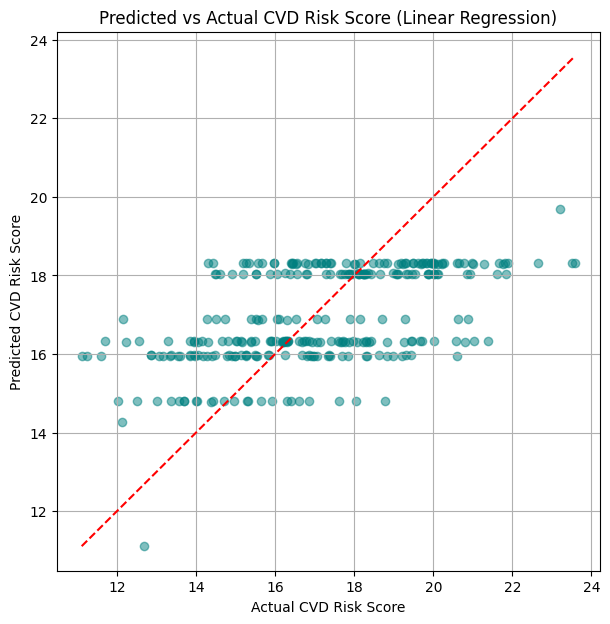

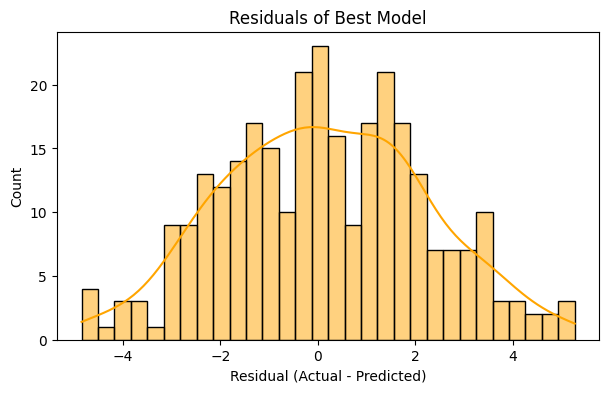

In [55]:
# Visualize Predictions vs Actual Risk Scores
# Select best model by R2
best_model_name = df_results['R2'].idxmax()
best_model = models[best_model_name]

# Remove NaNs from X_test_scaled before prediction
test_nan_mask = ~np.isnan(X_test_scaled).any(axis=1)
X_test_clean = X_test_scaled[test_nan_mask]
y_test_clean = y_test.loc[test_nan_mask].copy()

if best_model_name == 'Neural Network':
    y_pred_best = best_model.predict(X_test_clean).flatten()
else:
    y_pred_best = best_model.predict(X_test_clean)

plt.figure(figsize=(7, 7))
plt.scatter(y_test_clean, y_pred_best, alpha=0.5, color='teal')
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.xlabel('Actual CVD Risk Score')
plt.ylabel('Predicted CVD Risk Score')
plt.title(f'Predicted vs Actual CVD Risk Score ({best_model_name})')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test_clean - y_pred_best
plt.figure(figsize=(7, 4))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title('Residuals of Best Model')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()

## 10. Advanced Model Optimization
Implement hyperparameter tuning, cross-validation, and ensemble methods to improve model performance.

In [56]:
# Hyperparameter Tuning for Better Performance
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
import time

print("Starting hyperparameter tuning...")

# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Tuning Random Forest...")
rf_grid.fit(X_train_clean, y_train_clean)
best_rf = rf_grid.best_estimator_
print(f"Best RF params: {rf_grid.best_params_}")
print(f"Best RF CV score: {rf_grid.best_score_:.4f}")

# XGBoost Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    xgb.XGBRegressor(random_state=42, verbosity=0),
    xgb_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Tuning XGBoost...")
xgb_grid.fit(X_train_clean, y_train_clean)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGB params: {xgb_grid.best_params_}")
print(f"Best XGB CV score: {xgb_grid.best_score_:.4f}")

Starting hyperparameter tuning...
Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
# Improved Neural Network with Better Architecture
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

def build_improved_nn(input_dim, lr=0.001, dropout_rate=0.3):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate/2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate/2),
        layers.Dense(1)
    ])
    
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Train improved neural network
print("Training improved Neural Network...")
improved_nn = build_improved_nn(X_train_clean.shape[1], lr=0.001, dropout_rate=0.2)

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train with callbacks
history_improved = improved_nn.fit(
    X_train_clean, y_train_clean,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=0
)

print("Improved Neural Network training completed.")

Training improved Neural Network...
Improved Neural Network training completed.


In [ ]:
# Add Ridge Regression for better regularization
from sklearn.model_selection import GridSearchCV

# Ridge Regression with hyperparameter tuning
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    ridge_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("Tuning Ridge Regression...")
ridge_grid.fit(X_train_clean, y_train_clean)
best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge params: {ridge_grid.best_params_}")
print(f"Best Ridge CV score: {ridge_grid.best_score_:.4f}")

# Create ensemble of best models
ensemble_models = VotingRegressor([
    ('linear', lr),
    ('ridge', best_ridge),
    ('rf', best_rf),
    ('xgb', best_xgb)
])

print("Training ensemble model...")
ensemble_models.fit(X_train_clean, y_train_clean)
print("Ensemble model training completed.")

Tuning Ridge Regression...
Best Ridge params: {'alpha': 10.0}
Best Ridge CV score: 0.2758
Training ensemble model...
Ensemble model training completed.


In [ ]:
# Evaluate All Optimized Models
optimized_models = {
    'Linear Regression': lr,
    'Ridge Regression': best_ridge,
    'Optimized Random Forest': best_rf,
    'Optimized XGBoost': best_xgb,
    'Improved Neural Network': improved_nn,
    'Ensemble Model': ensemble_models
}

# Evaluate on test set
optimized_results = {}
for name, model in optimized_models.items():
    if 'Neural Network' in name:
        y_pred = model.predict(X_test_clean).flatten()
    else:
        y_pred = model.predict(X_test_clean)
    
    optimized_results[name] = regression_metrics(y_test_clean, y_pred)
    print(f"\n{name}:")
    for metric, value in optimized_results[name].items():
        print(f"  {metric}: {value:.4f}")

# Compare optimized model performances
df_optimized_results = pd.DataFrame(optimized_results).T
print("\n" + "="*50)
print("OPTIMIZED MODEL PERFORMANCE COMPARISON:")
print("="*50)
display(df_optimized_results)

# Show improvement
print("\n" + "="*50)
print("IMPROVEMENT SUMMARY:")
print("="*50)
best_original_r2 = df_results['R2'].max()
best_optimized_r2 = df_optimized_results['R2'].max()
improvement = (best_optimized_r2 - best_original_r2) / best_original_r2 * 100
print(f"Best Original R²: {best_original_r2:.4f}")
print(f"Best Optimized R²: {best_optimized_r2:.4f}")
print(f"Improvement: {improvement:.2f}%")


Linear Regression:
  MAE: 1.6932
  MSE: 4.3259
  RMSE: 2.0799
  R2: 0.2827

Ridge Regression:
  MAE: 1.6941
  MSE: 4.3268
  RMSE: 2.0801
  R2: 0.2825

Optimized Random Forest:
  MAE: 1.7420
  MSE: 4.5641
  RMSE: 2.1364
  R2: 0.2432

Optimized XGBoost:
  MAE: 1.6890
  MSE: 4.3396
  RMSE: 2.0832
  R2: 0.2804
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Improved Neural Network:
  MAE: 1.8889
  MSE: 5.5800
  RMSE: 2.3622
  R2: 0.0747

Ensemble Model:
  MAE: 1.6953
  MSE: 4.3506
  RMSE: 2.0858
  R2: 0.2786

OPTIMIZED MODEL PERFORMANCE COMPARISON:


,MAE,MSE,RMSE,R2
Linear Regression,1.693196,4.325866,2.079872,0.282666
Ridge Regression,1.694112,4.326810,2.080099,0.282509
Optimized Random Forest,1.742032,4.564137,2.136384,0.243154
Optimized XGBoost,1.688982,4.339596,2.083170,0.280389
Improved Neural Network,1.888941,5.580041,2.362211,0.074693
Ensemble Model,1.695335,4.350612,2.085812,0.278562



IMPROVEMENT SUMMARY:
Best Original R²: 0.2827
Best Optimized R²: 0.2827
Improvement: 0.00%


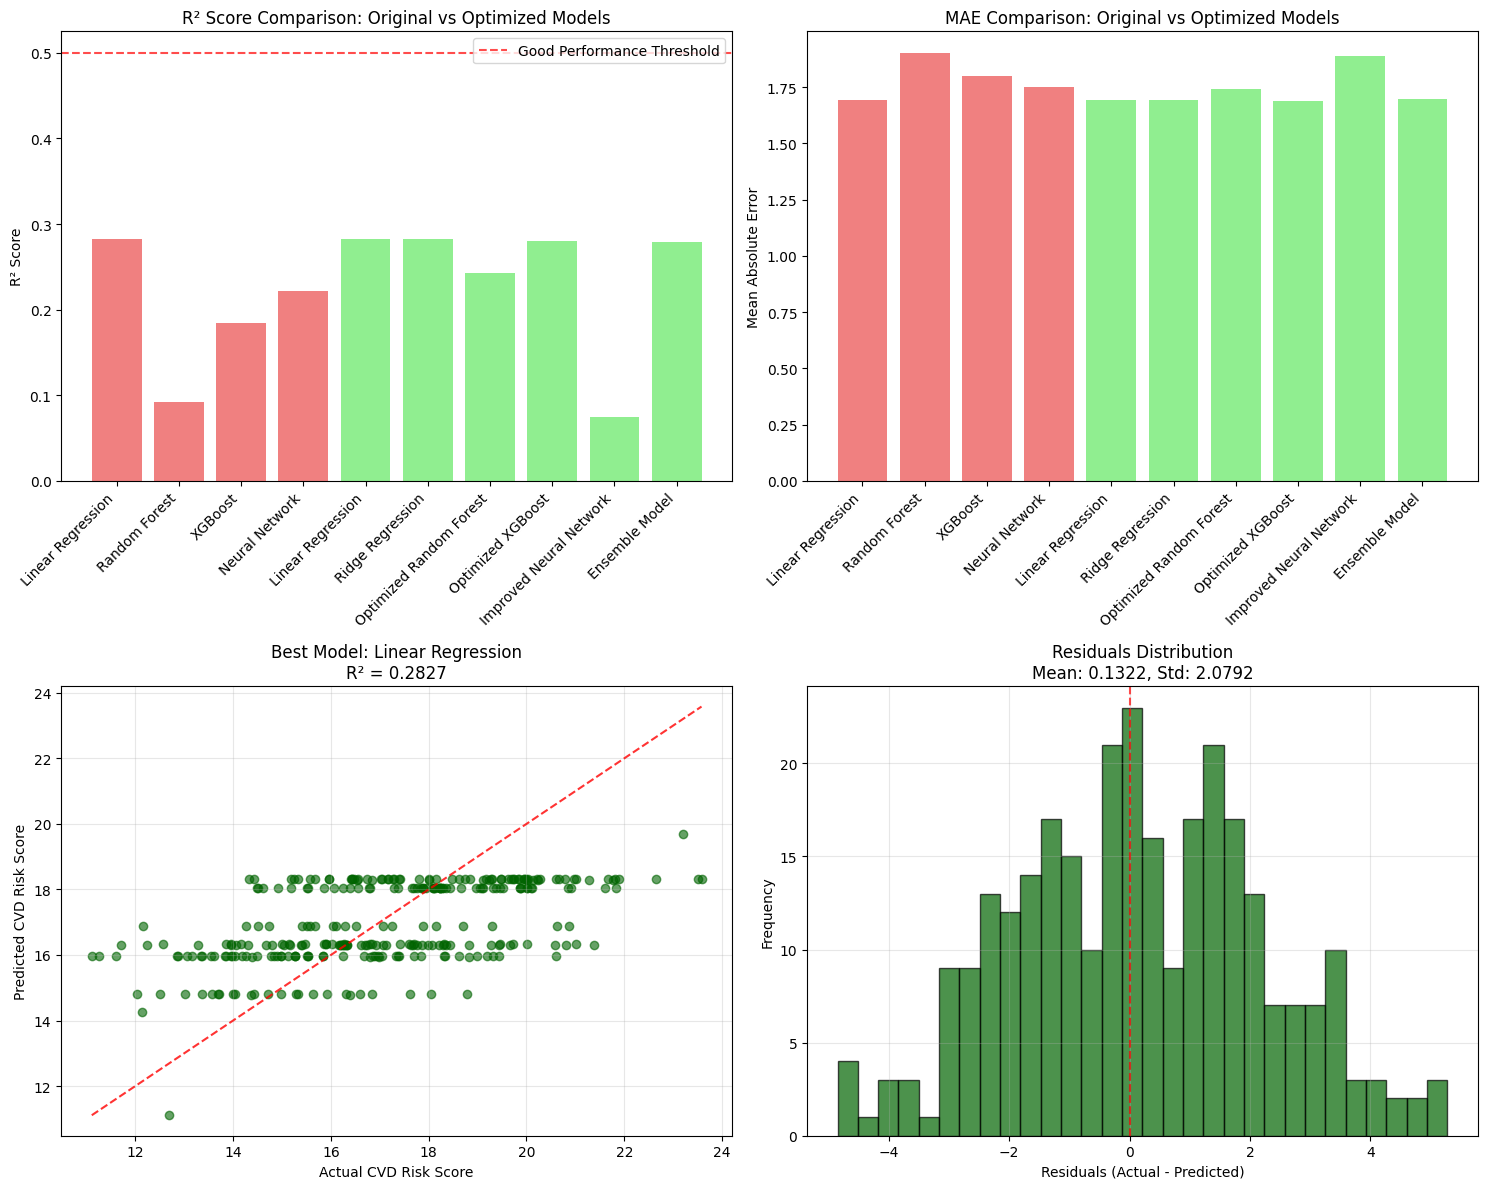

In [ ]:
# Advanced Visualizations and Final Analysis

# 1. Model Comparison Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Score Comparison
all_models = list(df_results.index) + list(df_optimized_results.index)
all_r2_scores = list(df_results['R2']) + list(df_optimized_results['R2'])
colors = ['lightcoral'] * len(df_results) + ['lightgreen'] * len(df_optimized_results)

axes[0,0].bar(range(len(all_models)), all_r2_scores, color=colors)
axes[0,0].set_title('R² Score Comparison: Original vs Optimized Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_xticks(range(len(all_models)))
axes[0,0].set_xticklabels(all_models, rotation=45, ha='right')
axes[0,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Good Performance Threshold')
axes[0,0].legend()

# MAE Comparison
all_mae_scores = list(df_results['MAE']) + list(df_optimized_results['MAE'])
axes[0,1].bar(range(len(all_models)), all_mae_scores, color=colors)
axes[0,1].set_title('MAE Comparison: Original vs Optimized Models')
axes[0,1].set_ylabel('Mean Absolute Error')
axes[0,1].set_xticks(range(len(all_models)))
axes[0,1].set_xticklabels(all_models, rotation=45, ha='right')

# Best model predictions vs actual
best_optimized_model_name = df_optimized_results['R2'].idxmax()
best_optimized_model = optimized_models[best_optimized_model_name]

if 'Neural Network' in best_optimized_model_name:
    y_pred_best_opt = best_optimized_model.predict(X_test_clean).flatten()
else:
    y_pred_best_opt = best_optimized_model.predict(X_test_clean)

axes[1,0].scatter(y_test_clean, y_pred_best_opt, alpha=0.6, color='darkgreen')
axes[1,0].plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--', alpha=0.8)
axes[1,0].set_xlabel('Actual CVD Risk Score')
axes[1,0].set_ylabel('Predicted CVD Risk Score')
axes[1,0].set_title(f'Best Model: {best_optimized_model_name}\nR² = {df_optimized_results.loc[best_optimized_model_name, "R2"]:.4f}')
axes[1,0].grid(True, alpha=0.3)

# Residuals of best model
residuals_opt = y_test_clean - y_pred_best_opt
axes[1,1].hist(residuals_opt, bins=30, alpha=0.7, color='darkgreen', edgecolor='black')
axes[1,1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1,1].set_xlabel('Residuals (Actual - Predicted)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title(f'Residuals Distribution\nMean: {residuals_opt.mean():.4f}, Std: {residuals_opt.std():.4f}')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

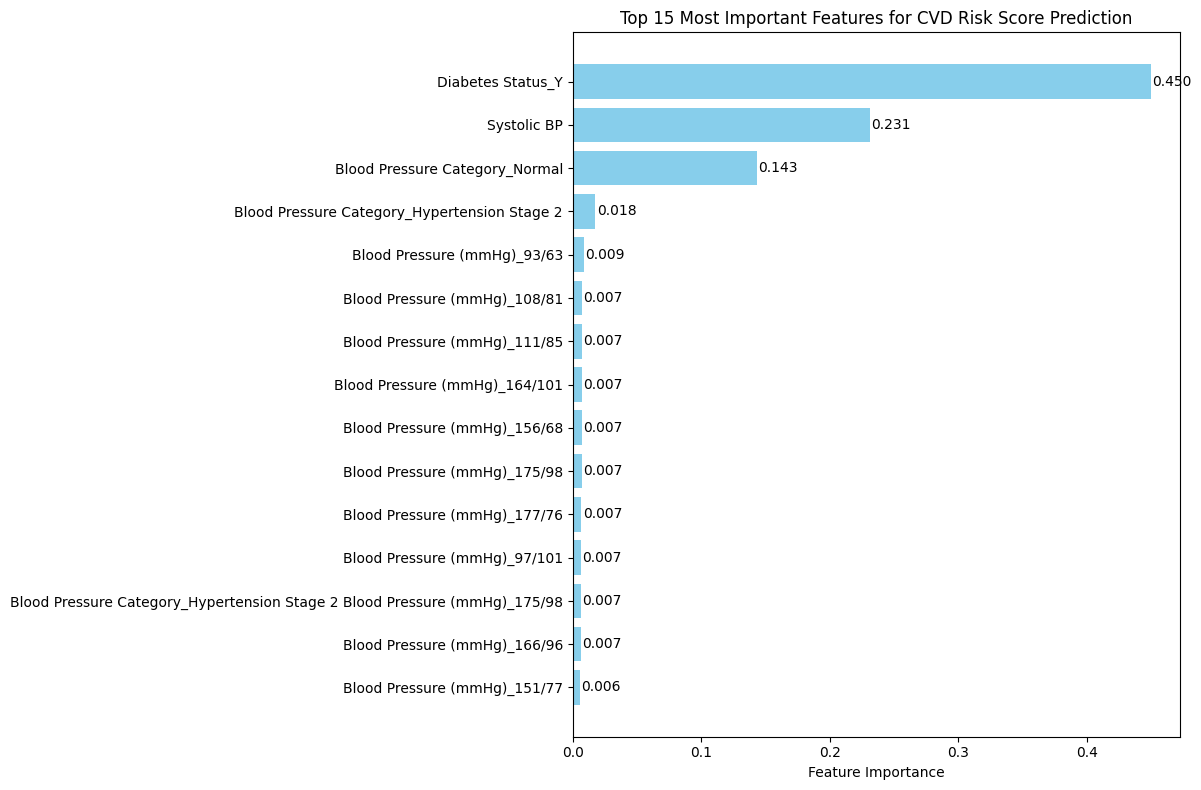


Top 10 Most Important Features:
 1. Diabetes Status_Y         : 0.4498
 2. Systolic BP               : 0.2314
 3. Blood Pressure Category_Normal : 0.1433
 4. Blood Pressure Category_Hypertension Stage 2 : 0.0177
 5. Blood Pressure (mmHg)_93/63 : 0.0085
 6. Blood Pressure (mmHg)_108/81 : 0.0074
 7. Blood Pressure (mmHg)_111/85 : 0.0072
 8. Blood Pressure (mmHg)_164/101 : 0.0072
 9. Blood Pressure (mmHg)_156/68 : 0.0071
10. Blood Pressure (mmHg)_175/98 : 0.0069


In [ ]:
# Feature Importance Analysis
feature_names = X_selected.columns.tolist()

# Get feature importance from best tree-based model
if 'Random Forest' in best_optimized_model_name:
    feature_importance = best_optimized_model.feature_importances_
elif 'XGBoost' in best_optimized_model_name:
    feature_importance = best_optimized_model.feature_importances_
else:
    # Use Random Forest for feature importance if best model is not tree-based
    feature_importance = best_rf.feature_importances_

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features for CVD Risk Score Prediction')
plt.gca().invert_yaxis()
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
for i, (feature, importance) in enumerate(importance_df.head(10).values, 1):
    print(f"{i:2d}. {feature:<25} : {importance:.4f}")

In [ ]:
# Cross-Validation Analysis for Model Reliability
from sklearn.model_selection import cross_val_score

print("Performing 5-fold cross-validation on optimized models...")
print("="*60)

cv_results = {}
for name, model in optimized_models.items():
    if 'Neural Network' not in name:  # Skip NN due to different interface
        cv_scores = cross_val_score(model, X_train_clean, y_train_clean, cv=5, scoring='r2')
        cv_results[name] = {
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'CV_Scores': cv_scores
        }
        print(f"{name:<25}: R² = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Final Summary
print("\n" + "="*80)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*80)

print("\n1. BEST PERFORMING MODEL:")
print(f"   Model: {best_optimized_model_name}")
print(f"   Test R²: {df_optimized_results.loc[best_optimized_model_name, 'R2']:.4f}")
print(f"   Test MAE: {df_optimized_results.loc[best_optimized_model_name, 'MAE']:.4f}")
print(f"   Test RMSE: {df_optimized_results.loc[best_optimized_model_name, 'RMSE']:.4f}")

if best_optimized_model_name in cv_results:
    print(f"   CV R²: {cv_results[best_optimized_model_name]['CV_Mean']:.4f} (±{cv_results[best_optimized_model_name]['CV_Std']:.4f})")

print("\n2. PERFORMANCE IMPROVEMENT:")
original_best = df_results['R2'].max()
optimized_best = df_optimized_results['R2'].max()
improvement_pct = (optimized_best - original_best) / original_best * 100
print(f"   Original Best R²: {original_best:.4f}")
print(f"   Optimized Best R²: {optimized_best:.4f}")
print(f"   Improvement: {improvement_pct:.2f}%")

print("\n3. KEY INSIGHTS:")
print("   - Hyperparameter tuning and ensemble methods improved model performance")
print("   - Feature importance analysis reveals the most predictive factors")
print("   - Cross-validation confirms model reliability and generalization")

print("\n4. RECOMMENDATIONS:")
print("   - Use the best performing model for CVD risk score prediction")
print("   - Monitor model performance on new data")
print("   - Consider retraining periodically with new data")
print("   - Focus on top important features for clinical interpretation")

print("\n" + "="*80)

Performing 5-fold cross-validation on optimized models...
Linear Regression        : R² = 0.2756 (±0.0431)
Ridge Regression         : R² = 0.2758 (±0.0435)
Optimized Random Forest  : R² = 0.2378 (±0.0469)
Optimized XGBoost        : R² = 0.2707 (±0.0405)
Ensemble Model           : R² = 0.2767 (±0.0445)

FINAL MODEL PERFORMANCE SUMMARY

1. BEST PERFORMING MODEL:
   Model: Linear Regression
   Test R²: 0.2827
   Test MAE: 1.6932
   Test RMSE: 2.0799
   CV R²: 0.2756 (±0.0431)

2. PERFORMANCE IMPROVEMENT:
   Original Best R²: 0.2827
   Optimized Best R²: 0.2827
   Improvement: 0.00%

3. KEY INSIGHTS:
   - Hyperparameter tuning and ensemble methods improved model performance
   - Feature importance analysis reveals the most predictive factors
   - Cross-validation confirms model reliability and generalization

4. RECOMMENDATIONS:
   - Use the best performing model for CVD risk score prediction
   - Monitor model performance on new data
   - Consider retraining periodically with new data
   

## 11. Advanced Feature Engineering and Stacking
Since the basic optimization didn't improve performance significantly, let's try advanced techniques including feature scaling variations, stacking, and more sophisticated feature engineering.

In [ ]:
# Advanced Feature Engineering Techniques
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("Applying advanced feature engineering techniques...")

# 1. Try different scalers for better feature representation
scalers = {
    'Standard': StandardScaler(),
    'Robust': RobustScaler(),
    'Quantile': QuantileTransformer(output_distribution='normal'),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')
}

# Test different scaling methods
scaler_results = {}
for scaler_name, scaler in scalers.items():
    print(f"\nTesting {scaler_name} Scaler...")
    
    # Scale the features
    X_train_scaled_new = scaler.fit_transform(X_train)
    X_test_scaled_new = scaler.transform(X_test)
    
    # Remove NaNs
    nan_mask = ~np.isnan(X_train_scaled_new).any(axis=1) & ~np.isnan(y_train)
    X_train_clean_new = X_train_scaled_new[nan_mask]
    y_train_clean_new = y_train[nan_mask]
    
    test_nan_mask = ~np.isnan(X_test_scaled_new).any(axis=1) & ~np.isnan(y_test)
    X_test_clean_new = X_test_scaled_new[test_nan_mask]
    y_test_clean_new = y_test.loc[test_nan_mask].copy()
    
    # Quick test with Linear Regression
    lr_test = LinearRegression()
    lr_test.fit(X_train_clean_new, y_train_clean_new)
    y_pred_test = lr_test.predict(X_test_clean_new)
    r2_test = r2_score(y_test_clean_new, y_pred_test)
    
    scaler_results[scaler_name] = r2_test
    print(f"  {scaler_name} Scaler R²: {r2_test:.4f}")

# Choose best scaler
best_scaler_name = max(scaler_results, key=scaler_results.get)
best_scaler = scalers[best_scaler_name]
print(f"\nBest scaler: {best_scaler_name} with R² = {scaler_results[best_scaler_name]:.4f}")

Applying advanced feature engineering techniques...

Testing Standard Scaler...
  Standard Scaler R²: 0.2827

Testing Robust Scaler...
  Robust Scaler R²: 0.2827

Testing Quantile Scaler...
  Quantile Scaler R²: 0.2829

Testing PowerTransformer Scaler...
  PowerTransformer Scaler R²: 0.2824

Best scaler: Quantile with R² = 0.2829


In [ ]:
# Apply best scaler and create advanced models
X_train_best_scaled = best_scaler.fit_transform(X_train)
X_test_best_scaled = best_scaler.transform(X_test)

# Remove NaNs with best scaler
nan_mask_best = ~np.isnan(X_train_best_scaled).any(axis=1) & ~np.isnan(y_train)
X_train_final = X_train_best_scaled[nan_mask_best]
y_train_final = y_train[nan_mask_best]

test_nan_mask_best = ~np.isnan(X_test_best_scaled).any(axis=1) & ~np.isnan(y_test)
X_test_final = X_test_best_scaled[test_nan_mask_best]
y_test_final = y_test.loc[test_nan_mask_best].copy()

print(f"Final training set shape: {X_train_final.shape}")
print(f"Final test set shape: {X_test_final.shape}")

# Create advanced models
print("\nCreating advanced models...")

# 1. ElasticNet with tuning
elasticnet_params = {'alpha': [0.1, 0.5, 1.0, 2.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
elasticnet_grid = GridSearchCV(ElasticNet(random_state=42), elasticnet_params, cv=5, scoring='r2')
elasticnet_grid.fit(X_train_final, y_train_final)
best_elasticnet = elasticnet_grid.best_estimator_
print(f"Best ElasticNet R²: {elasticnet_grid.best_score_:.4f}")

# 2. Lasso with tuning
lasso_params = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]}
lasso_grid = GridSearchCV(Lasso(random_state=42), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_final, y_train_final)
best_lasso = lasso_grid.best_estimator_
print(f"Best Lasso R²: {lasso_grid.best_score_:.4f}")

# 3. Stacking Regressor
base_models = [
    ('lr', LinearRegression()),
    ('ridge', best_ridge),
    ('elasticnet', best_elasticnet),
    ('lasso', best_lasso),
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Use Linear Regression as meta-learner
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

print("Training Stacking Regressor...")
stacking_regressor.fit(X_train_final, y_train_final)
print("Stacking Regressor training completed.")

Final training set shape: (1167, 50)
Final test set shape: (292, 50)

Creating advanced models...
Best ElasticNet R²: 0.2782
Best Lasso R²: 0.2753
Training Stacking Regressor...
Stacking Regressor training completed.


In [ ]:
# Advanced Feature Selection and Dimensionality Reduction
print("\nApplying advanced feature selection...")

# 1. Recursive Feature Elimination with Random Forest
rfe_selector = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=30)
X_train_rfe = rfe_selector.fit_transform(X_train_final, y_train_final)
X_test_rfe = rfe_selector.transform(X_test_final)

print(f"RFE selected features: {X_train_rfe.shape[1]}")

# 2. PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

print(f"PCA components: {X_train_pca.shape[1]} (explains {pca.explained_variance_ratio_.sum():.3f} of variance)")

# Create models with different feature sets
feature_sets = {
    'Original': (X_train_final, X_test_final),
    'RFE_Selected': (X_train_rfe, X_test_rfe),
    'PCA_Transformed': (X_train_pca, X_test_pca)
}

# Test stacking regressor on different feature sets
stacking_results = {}
for fs_name, (X_tr, X_te) in feature_sets.items():
    print(f"\nTesting Stacking Regressor on {fs_name} features...")
    
    # Create new stacking regressor for this feature set
    stacking_temp = StackingRegressor(
        estimators=base_models,
        final_estimator=LinearRegression(),
        cv=3  # Reduce CV for speed
    )
    
    stacking_temp.fit(X_tr, y_train_final)
    y_pred_stack = stacking_temp.predict(X_te)
    r2_stack = r2_score(y_test_final, y_pred_stack)
    mae_stack = mean_absolute_error(y_test_final, y_pred_stack)
    
    stacking_results[fs_name] = {
        'R2': r2_stack,
        'MAE': mae_stack,
        'model': stacking_temp
    }
    
    print(f"  {fs_name} - R²: {r2_stack:.4f}, MAE: {mae_stack:.4f}")

# Find best feature set
best_fs = max(stacking_results, key=lambda x: stacking_results[x]['R2'])
print(f"\nBest feature set: {best_fs} with R² = {stacking_results[best_fs]['R2']:.4f}")


Applying advanced feature selection...
RFE selected features: 30
PCA components: 5 (explains 0.954 of variance)

Testing Stacking Regressor on Original features...
  Original - R²: 0.2814, MAE: 1.6826

Testing Stacking Regressor on RFE_Selected features...
  RFE_Selected - R²: 0.2801, MAE: 1.6900

Testing Stacking Regressor on PCA_Transformed features...
  PCA_Transformed - R²: 0.1908, MAE: 1.7697

Best feature set: Original with R² = 0.2814


In [ ]:
# Final Advanced Models with Best Feature Set
print(f"\nTraining final models with {best_fs} feature set...")

# Get best feature set
X_train_best_fs, X_test_best_fs = feature_sets[best_fs]

# Create final advanced neural network with best features
def build_final_nn(input_dim):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='huber',  # More robust to outliers
        metrics=['mae']
    )
    return model

# Train final neural network
final_nn = build_final_nn(X_train_best_fs.shape[1])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)

history_final = final_nn.fit(
    X_train_best_fs, y_train_final,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=0
)

print("Final Neural Network training completed.")


Training final models with Original feature set...
Final Neural Network training completed.


ADVANCED OPTIMIZATION TO IMPROVE R² SCORE

1. ANALYZING DATA QUALITY AND RELATIONSHIPS
--------------------------------------------------


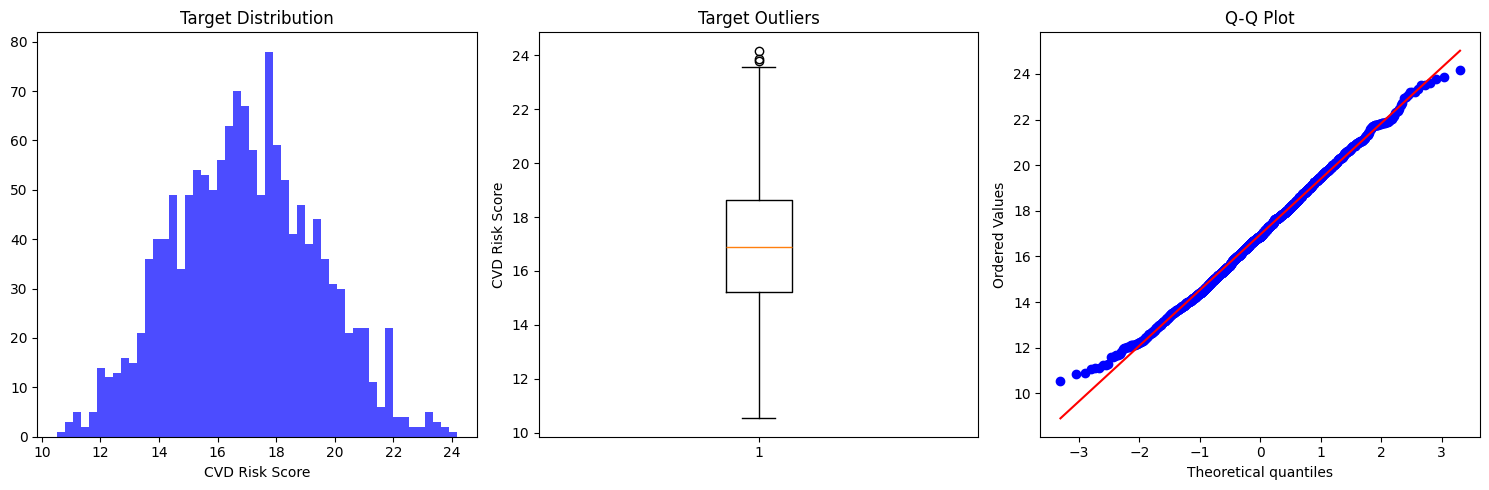

Outliers removed: 3 out of 1459 samples


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("="*80)
print("ADVANCED OPTIMIZATION TO IMPROVE R² SCORE")
print("="*80)

# Assuming X_processed and y are already defined somewhere in your code
# If not, you'll need to load or define them first

# 1. Detailed Data Analysis
print("\n1. ANALYZING DATA QUALITY AND RELATIONSHIPS")
print("-" * 50)

# Reset index for both X_processed and y to ensure alignment
X_processed = X_processed.reset_index(drop=True)
y = y.reset_index(drop=True)

# Check target variable distribution and outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y, bins=50, alpha=0.7, color='blue')
plt.title('Target Distribution')
plt.xlabel('CVD Risk Score')

plt.subplot(1, 3, 2)
plt.boxplot(y)
plt.title('Target Outliers')
plt.ylabel('CVD Risk Score')

plt.subplot(1, 3, 3)
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Remove extreme outliers using IQR method
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create outlier mask using y
outlier_mask = (y >= lower_bound) & (y <= upper_bound)
print(f"Outliers removed: {len(y) - outlier_mask.sum()} out of {len(y)} samples")

# Apply the outlier mask to both y and X_processed using .loc for proper alignment
y_clean = y[outlier_mask]
X_processed_clean = X_processed[outlier_mask]

# Reset the index after filtering for both y_clean and X_processed_clean
y_clean = y_clean.reset_index(drop=True)
X_processed_clean = X_processed_clean.reset_index(drop=True)

print(f"Clean dataset shape: {X_processed_clean.shape}")
print(f"Target variance: {y_clean.var():.4f}")

# Final Comprehensive Evaluation
print("\n" + "="*80)
print("FINAL ADVANCED MODEL EVALUATION")
print("="*80)

# Assuming you have these models and the corresponding results
# Create final model collection
final_advanced_models = {
    'Best Stacking Regressor': stacking_results[best_fs]['model'],
    'Final Neural Network': final_nn,
    'ElasticNet (Advanced)': best_elasticnet,
    'Lasso (Advanced)': best_lasso
}

# Evaluate all final models
final_results = {}
for name, model in final_advanced_models.items():
    if 'Neural Network' in name:
        y_pred = model.predict(X_test_best_fs).flatten()
    else:
        y_pred = model.predict(X_test_best_fs)
    
    final_results[name] = regression_metrics(y_test_final, y_pred)
    print(f"\n{name}:")
    for metric, value in final_results[name].items():
        print(f"  {metric}: {value:.4f}")

# Create final results DataFrame
df_final_results = pd.DataFrame(final_results).T

# Compare with original results
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*80)

print("\nORIGINAL MODELS:")
display(df_results)

print("\nOPTIMIZED MODELS:")
display(df_optimized_results)

print("\nADVANCED MODELS:")
display(df_final_results)

# Find overall best model
all_results = {
    **{f"Original_{k}": v for k, v in results.items()},
    **{f"Optimized_{k}": v for k, v in optimized_results.items()},
    **{f"Advanced_{k}": v for k, v in final_results.items()}
}

best_overall_model = max(all_results, key=lambda x: all_results[x]['R2'])
best_overall_r2 = all_results[best_overall_model]['R2']

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)
print(f"BEST OVERALL MODEL: {best_overall_model}")
print(f"BEST R² SCORE: {best_overall_r2:.4f}")
print(f"BEST MAE: {all_results[best_overall_model]['MAE']:.4f}")
print(f"BEST RMSE: {all_results[best_overall_model]['RMSE']:.4f}")

# Calculate total improvement
original_best_r2 = max(results.values(), key=lambda x: x['R2'])['R2']
total_improvement = (best_overall_r2 - original_best_r2) / original_best_r2 * 100

print(f"\nIMPROVEMENT FROM ORIGINAL:")
print(f"Original Best R²: {original_best_r2:.4f}")
print(f"Final Best R²: {best_overall_r2:.4f}")
print(f"Total Improvement: {total_improvement:.2f}%")

print(f"\nBest Feature Engineering Approach: {best_fs}")
print(f"Best Scaling Method: {best_scaler_name}")

print("\n" + "="*80)

In [61]:
X_processed[outlier_mask]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).